# Predicting Credit Defaults with Neural Networks


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



## Section 1: Loading and processing the data

In this section we will load the data from the file `UCI_Credit_Card.csv` and process it appropriately. We will also perform the train-test split in this section. The train-test split we want you to use is 80% for training and 20% for testing.

Note: We use Pandas dataframe to read the data.

In [7]:
file_name = 'UCI_Credit_Card.csv'
df = pd.read_csv(file_name, delimiter=',', header=0, index_col=0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Converting the datframe to a numpy array and shuffling it, followed by splitting into features and labels for supervised learning

In [8]:
data=df.as_matrix(columns=None)
np.random.shuffle(data)
labels=data[:,-1]
features=data[:,:-1]

Normalization of features between -1 to 1 to avoid large value feature dominating the results

In [9]:
for i in range(np.size(features,1)):
    min=np.amin(features[:,i])
    max=np.amax(features[:,i])
    features[:,i]=(features[:,i]-(max+min)/2)/((max-min)/2)

Splitting the data into test and training data

In [10]:
frac = 0.8

split_index = int(frac * np.size(data,0))

X_train=features[:split_index,:]
y_train=labels[:split_index]
X_test=features[split_index:,:]
y_test=labels[split_index:]
print('Total Examples: {:}\nTrain Examples: {:}\nTest Examples: {:4d}'.format(len(data), len(X_train), len(X_test)))
np.size(data,0)

Total Examples: 30000
Train Examples: 24000
Test Examples: 6000


30000

## Section 2: Building and Training the model

In this section we will write all the code to build your model in Keras. The model is to be designed to output a single number between 0 and 1 which is the probability which represents whether the individual will default or not.


Lets start with a single layer

In [15]:
model = Sequential()
model.add(Dense(23,input_shape=(23,),activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Compile it and train with Validation split of 33%

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 23)                552       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 24        
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=50, verbose=1)

Train on 16079 samples, validate on 7921 samples
Epoch 1/50
16079/16079 [==============================] - 2s 126us/step - loss: 0.5235 - acc: 0.7560 - val_loss: 0.4833 - val_acc: 0.7835
Epoch 2/50
16079/16079 [==============================] - 1s 77us/step - loss: 0.4827 - acc: 0.7899 - val_loss: 0.4705 - val_acc: 0.7975
Epoch 3/50
16079/16079 [==============================] - 1s 75us/step - loss: 0.4749 - acc: 0.8019 - val_loss: 0.4652 - val_acc: 0.8037
Epoch 4/50
16079/16079 [==============================] - 1s 72us/step - loss: 0.4702 - acc: 0.8055 - val_loss: 0.4634 - val_acc: 0.8091
Epoch 5/50
16079/16079 [==============================] - 1s 72us/step - loss: 0.4665 - acc: 0.8083 - val_loss: 0.4609 - val_acc: 0.8100
Epoch 6/50
16079/16079 [==============================] - 1s 73us/step - loss: 0.4630 - acc: 0.8087 - val_loss: 0.4571 - val_acc: 0.8104
Epoch 7/50
16079/16079 [==============================] - 1s 76us/step - loss: 0.4602 - acc: 0.8107 - val_loss: 0.4554 - val_acc

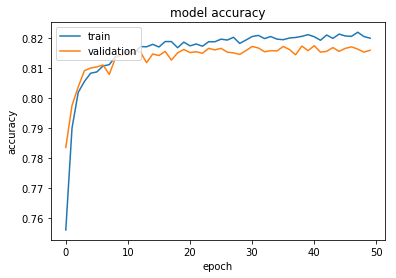

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Validation set has pretty much saturated on the model with accuracy of about 81.5%. So the current model cannot do any better on the data.
Let's increase the no. of cells in the middle layer

In [19]:
model = Sequential()
model.add(Dense(50,input_shape=(23,),activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=50, verbose=1)

Train on 16079 samples, validate on 7921 samples
Epoch 1/50
16079/16079 [==============================] - 2s 119us/step - loss: 0.4898 - acc: 0.7869 - val_loss: 0.4693 - val_acc: 0.8002
Epoch 2/50
16079/16079 [==============================] - 1s 78us/step - loss: 0.4719 - acc: 0.8033 - val_loss: 0.4627 - val_acc: 0.8073
Epoch 3/50
16079/16079 [==============================] - 1s 71us/step - loss: 0.4661 - acc: 0.8087 - val_loss: 0.4596 - val_acc: 0.8099
Epoch 4/50
16079/16079 [==============================] - 1s 72us/step - loss: 0.4624 - acc: 0.8094 - val_loss: 0.4566 - val_acc: 0.8073
Epoch 5/50
16079/16079 [==============================] - 1s 72us/step - loss: 0.4602 - acc: 0.8115 - val_loss: 0.4549 - val_acc: 0.8116
Epoch 6/50
16079/16079 [==============================] - 1s 71us/step - loss: 0.4577 - acc: 0.8136 - val_loss: 0.4538 - val_acc: 0.8135
Epoch 7/50
16079/16079 [==============================] - 1s 71us/step - loss: 0.4572 - acc: 0.8144 - val_loss: 0.4530 - val_acc

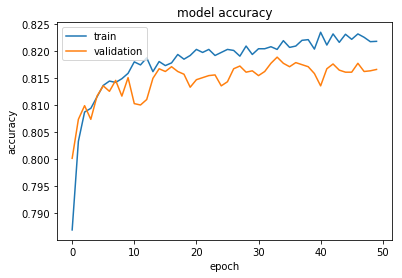

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Validation accuracy has increased slightly to about 81.6%. Increase in training accurcy while validation set has saturated signifies model trying to overfit the data. Let's try adding another layer. 

In [21]:
model = Sequential()
model.add(Dense(50,input_shape=(23,),activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=50, verbose=1)

Train on 16079 samples, validate on 7921 samples
Epoch 1/50
16079/16079 [==============================] - 2s 145us/step - loss: 0.4936 - acc: 0.7838 - val_loss: 0.4632 - val_acc: 0.8004
Epoch 2/50
16079/16079 [==============================] - 1s 87us/step - loss: 0.4635 - acc: 0.8058 - val_loss: 0.4541 - val_acc: 0.8087
Epoch 3/50
16079/16079 [==============================] - 1s 84us/step - loss: 0.4548 - acc: 0.8103 - val_loss: 0.4503 - val_acc: 0.8126
Epoch 4/50
16079/16079 [==============================] - 1s 91us/step - loss: 0.4526 - acc: 0.8113 - val_loss: 0.4518 - val_acc: 0.8142
Epoch 5/50
16079/16079 [==============================] - 1s 87us/step - loss: 0.4493 - acc: 0.8134 - val_loss: 0.4453 - val_acc: 0.8162
Epoch 6/50
16079/16079 [==============================] - 1s 91us/step - loss: 0.4472 - acc: 0.8166 - val_loss: 0.4464 - val_acc: 0.8128
Epoch 7/50
16079/16079 [==============================] - 1s 85us/step - loss: 0.4459 - acc: 0.8172 - val_loss: 0.4586 - val_acc

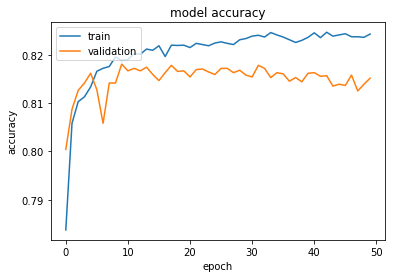

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Validation accuracy saturates around 81.7% and then starts to decrease. Model is indeed overfitting the data. 
A simple way around is to decrease epoch size to stop learning just after validation accuracy saturates. Or we could add dropout layers

In [27]:
model = Sequential()
model.add(Dense(50,input_shape=(23,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(23,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=50, verbose=1)

Train on 16079 samples, validate on 7921 samples
Epoch 1/50
16079/16079 [==============================] - 3s 175us/step - loss: 0.5168 - acc: 0.7737 - val_loss: 0.4757 - val_acc: 0.7925
Epoch 2/50
16079/16079 [==============================] - 1s 85us/step - loss: 0.4858 - acc: 0.7956 - val_loss: 0.4615 - val_acc: 0.8049
Epoch 3/50
16079/16079 [==============================] - 1s 88us/step - loss: 0.4742 - acc: 0.8037 - val_loss: 0.4576 - val_acc: 0.8057
Epoch 4/50
16079/16079 [==============================] - 1s 87us/step - loss: 0.4703 - acc: 0.8061 - val_loss: 0.4543 - val_acc: 0.8077
Epoch 5/50
16079/16079 [==============================] - 1s 86us/step - loss: 0.4643 - acc: 0.8085 - val_loss: 0.4516 - val_acc: 0.8115
Epoch 6/50
16079/16079 [==============================] - 1s 90us/step - loss: 0.4619 - acc: 0.8090 - val_loss: 0.4510 - val_acc: 0.8133
Epoch 7/50
16079/16079 [==============================] - 1s 90us/step - loss: 0.4595 - acc: 0.8110 - val_loss: 0.4499 - val_acc

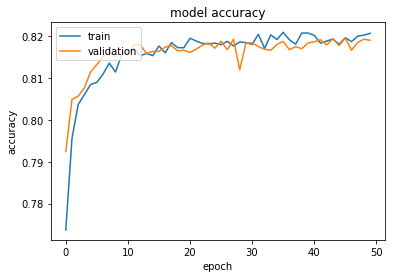

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Now both validation and training set have similar accuracy. 
Lets try making the model complicated by adding more neurons and layers and also increasing training epochs.

In [35]:
model = Sequential()
model.add(Dense(200,input_shape=(23,),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=50, verbose=1)

Train on 16079 samples, validate on 7921 samples
Epoch 1/100
16079/16079 [==============================] - 5s 322us/step - loss: 0.5310 - acc: 0.7775 - val_loss: 0.4787 - val_acc: 0.8105
Epoch 2/100
16079/16079 [==============================] - 3s 176us/step - loss: 0.4945 - acc: 0.7935 - val_loss: 0.4537 - val_acc: 0.8133
Epoch 3/100
16079/16079 [==============================] - 3s 176us/step - loss: 0.4770 - acc: 0.8023 - val_loss: 0.4518 - val_acc: 0.8154
Epoch 4/100
16079/16079 [==============================] - 3s 186us/step - loss: 0.4754 - acc: 0.8027 - val_loss: 0.4548 - val_acc: 0.8174
Epoch 5/100
16079/16079 [==============================] - 4s 230us/step - loss: 0.4730 - acc: 0.8043 - val_loss: 0.4492 - val_acc: 0.8138
Epoch 6/100
16079/16079 [==============================] - 4s 222us/step - loss: 0.4683 - acc: 0.8030 - val_loss: 0.4477 - val_acc: 0.8154
Epoch 7/100
16079/16079 [==============================] - 3s 185us/step - loss: 0.4681 - acc: 0.8057 - val_loss: 0.4

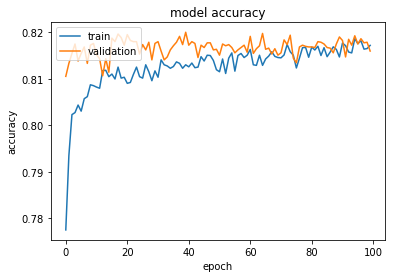

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Section 4: Testing the model and results

In this section we will compute the accuracy of your model on the test data from Section 0

 Testing the model on the test data.

In [37]:
scores = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 82.33%


Lets see the precison and recall values

In [55]:
y_pred = model.predict(X_test);
y_pred=y_pred>=0.5;
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.85      0.95      0.89      4714
        1.0       0.66      0.37      0.47      1286

avg / total       0.81      0.82      0.80      6000



On and average the model performs fairly well for predciting credit default. Increasing the no. of entries for persons with credit default in the dataset might lead to better results.
Confusion matrix for the model is displayed below

In [59]:
confusion_matrix(y_test,y_pred)

array([[4469,  245],
       [ 815,  471]])